# Sentiment Analysis of US Airline Twitter feeds

#### This can also be found on [my Git repository](https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-94Sip)

In [224]:
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [280]:
tweets = pd.read_csv('Tweets.csv')
tweets = tweets[['text', 'airline_sentiment']]
tweets.shape

(14640, 2)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

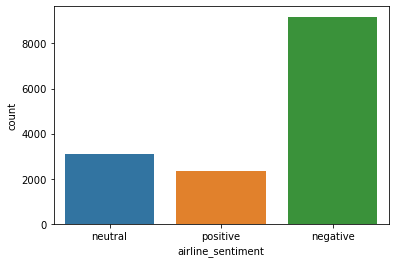

In [226]:
import seaborn as sns
sns.countplot(x="airline_sentiment", data=tweets)

In [30]:
tweets['airline_sentiment'].value_counts(normalize=True)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

#### Possible class imbalance since negative is almost 4x 'positive' label

In [227]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information

tweets.head(20)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


In [228]:
# looking at tail just to get a different view of the data and see more examples of text issues that need to be clearned

tweets.tail(20)

,text,airline_sentiment
14620,@AmericanAir I wait 2+ hrs for CS to call me back re why flt is cxld/protection &amp; they hang up the minute I answer on 1st ring?,negative
14621,"@AmericanAir I've been on hold for 55 mins about my Cancelled Flighted international flight. Am out of country, so can't leave a call back #. Help?",negative
14622,I just need a place to sleep when I land without accommodations in PLS @AmericanAir!,negative
14623,@AmericanAir Love the new planes for the JFK-LAX run. Maybe one day I will be on one where the amenities all function. #NoCharge #Ever,positive
14624,"@AmericanAir Call me Chairman, or call me Emerald. After what you did today to me, you can call me a former customer.",negative
14625,@AmericanAir Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI,positive
14626,@AmericanAir Flight 953 NYC-Buenos Aires has been delay since yesterday at 10PM. Is going to take off at 3.30PM now? Give us answers!,negative
14627,"@AmericanAir Flight Cancelled Flightled, can't go home until tomorrow. I could use dinner and a play, @AmericanAir! It's my first time in NYC.",negative
14628,"Thank you. “@AmericanAir: @jlhalldc Customer Relations will review your concerns and contact you back directly, John.”",positive
14629,@AmericanAir How do I change my flight if the phone system keeps telling me that the representatives are busy?,negative


#### Observations:
1. there are emojis and emoticons included in the corpus
2. there are @mentions and html, along with puncuation that needs to be removed

## Text Pre-Processing

### Outline for this section:
1. create dictionaries for handling emoticons and slang/shorthand language
2. Strip out HTML using BeautifulSoup
3. Remove URLs
4. Convert emojis to words using emoji library
5. convert numbers to words using num2words library
6. convert emoticons to text
7. expand contractions using contractions library
8. Tokenize

In [229]:
# emoticons - source: https://en.wikipedia.org/wiki/List_of_emoticons
def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":-D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        "‑(":"sad",
        ";(":"sad",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        "D‑':":"sad",
        "D:<":"sad",
        "D:":"sad",
        "D8":"sad",
        "D;":"sad",
        "D=":"sad",
        "DX":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ";p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }   

In [230]:
def load_slang_translation():
    return {
        "AFAIK":"As Far As I Know",
        "AFK": "Away From Keyboard",
        "ASAP":"As Soon As Possible",
        "ATK":"At The Keyboard",
        "ATM":"At The Moment",
        "A3":"Anytime, Anywhere, Anyplace",
        "BAK":"Back At Keyboard",
        "BBL":"Be Back Later",
        "BBS":"Be Back Soon",
        "BFN":"Bye For Now",
        "B4N":"Bye For Now",
        "BRB":"Be Right Back",
        "BRT":"Be Right There",
        "BTW":"By The Way",
        "B4":"Before",
        "B4N":"Bye For Now",
        "CU":"See You",
        "CUL8R":"See You Later",
        "CYA":"See You",
        "FAQ":"Frequently Asked Questions",
        "FC":"Fingers Crossed",
        "FWIW":"For What It's Worth",
        "FYI":"For Your Information",
        "GAL":"Get A Life",
        "GG":"Good Game",
        "GN":"Good Night",
        "GMTA":"Great Minds Think Alike",
        "GR8":"Great",
        "G9":"Genius",
        "IC":"I See",
        "ICQ":"I Seek you",
        "ILU":"ILU: I Love You",
        "IMHO":"In My Honest Opinion",
        "IMO":"In My Opinion",
        "IOW":"In Other Words",
        "IRL":"In Real Life",
        "KISS":"Keep It Simple, Stupid",
        "LDR":"Long Distance Relationship",
        "LMAO":"Laugh My A.. Off",
        "LOL":"Laughing Out Loud",
        "LTNS":"Long Time No See",
        "L8R":"Later",
        "MTE":"My Thoughts Exactly",
        "M8":"Mate",
        "NRN":"No Reply Necessary",
        "OIC":"Oh I See",
        "PITA":"Pain In The A..",
        "PRT":"Party",
        "PRW":"Parents Are Watching",
        "QPSA?":"Que Pasa",
        "ROFL":"Rolling On The Floor Laughing",
        "ROFLOL":"Rolling On The Floor Laughing Out Loud",
        "ROTFLMAO":"Rolling On The Floor Laughing My A.. Off",
        "SK8":"Skate",
        "STATS":"Your sex and age",
        "ASL":"Age, Sex, Location",
        "THX":"Thank You",
        "TTFN":"Ta-Ta For Now!",
        "TTYL":"Talk To You Later",
        "U":"You",
        "U2":"You Too",
        "U4E":"Yours For Ever",
        "WB":"Welcome Back",
        "WTF":"What The F...",
        "WTG":"Way To Go",
        "WUF":"Where Are You From",
        "W8":"Wait",
        "7K":"Sick:-D Laugher"
    }

In [231]:
import emoji
import re
from num2words import num2words

SMILEY = load_dict_smileys()

#defined regex patterns
num_pattern = r'\d+'
http_pattern = r'https?:\/\/\S+'
www_pattern = r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)"
single_char_pattern = r'\s+[a-zA-Z]\s+'

# Note: DO NOT converto to lowercase here. I am going to handle emoticons and capital letters mean something 

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def num_to_words(text):
	"""
	Return :- text which have all numbers or integers in the form of words
	Input :- string
	Output :- string
	"""
	# splitting text into words with space
	after_spliting = text.split()

	for index in range(len(after_spliting)):
		if after_spliting[index].isdigit():
			after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
	numbers_to_words = ' '.join(after_spliting)
	return numbers_to_words

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_numbers(text):
  text = re.sub(num_pattern, '', text)
  return text

def remove_urls(text):
    
    cleaned_text = re.sub(http_pattern, ' ', text)

    # remove url/website that didn't use http, is only checking for .com websites 
    # so words that are seperated by a . are not removed
    cleaned_text = re.sub(www_pattern, ' ', cleaned_text)
    return cleaned_text

def remove_single_char(text):
	"""
	Return :- string after removing single characters
	Input :- string
	Output:- string
	"""
	
	without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
	return without_sc

def convert_emoticons(text):
    words = text.split()    
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    return ' '.join(reformed)

def clean_up_tweets(text):

    cleaned_text = strip_html(text)

    # remove urls
    cleaned_text = remove_urls(cleaned_text)
    
    #convert emojis
    cleaned_text = emoji.demojize(cleaned_text)

    #convert numerics to words
    cleaned_text = num_to_words(cleaned_text)

    #convert emoticons to text - THIS MUST be done before tokenization
    cleaned_text = convert_emoticons(cleaned_text)
    
    cleaned_text = replace_contractions(cleaned_text)
    
    return cleaned_text

In [281]:
tweets['text'] = tweets.apply(lambda row: clean_up_tweets(row['text']), axis=1)

In [282]:
tweets.head(20)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing. it is really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away smiley",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there.",neutral
8,"@virginamerica Well, I did not…but NOW I DO! smiley",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me.",positive


In [283]:
# Tokenization
tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

#view tokenized data
tweets.head(20)

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative
5,"[@, VirginAmerica, seriously, would, pay, $, 30, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]",negative
6,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, smiley]",positive
7,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, .]",neutral
8,"[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, smiley]",positive
9,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., you, are, too, good, to, me, .]",positive


### After Tokenization we will do word-level normalization:
1. process shorthand/slang abbreviations
2. Remove any non-ASCII chars
3. Convert to lowercase
4. Remove punctuations
5. Remove stop words
6. strip whitespace 
7. Lemmatize 
8. join back together into string

In [284]:
stop_words = nltk.corpus.stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't",'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Adding in the airline proper names to avoid these being so prevalent
stop_words.append('united')
stop_words.append('virginamerica')
stop_words.append('americanair')
stop_words.append('southwestair')
stop_words.append('jetblue')
stop_words.append('usairways')
stop_words.append('flight')

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stop_words) - set(customlist))

In [277]:
import unicodedata

lemmatizer = WordNetLemmatizer()

SLANG = load_slang_translation()

def convert_slang(words):
    
    translated = [SLANG[word.upper()] if word.upper() in SLANG else word for word in words]
    return translated
    
def remove_non_ascii(words):
    """
    Remove non-ASCII characters from list of tokenized words. 
    this includes accented characters
    """
    new_words = []
    for word in words:
        try:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        except TypeError as te:
            print(f"problem word: {word}")
            raise
        else:
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        #new_word = re.sub(r'[.|,|)|(|\|/]',r' ', word) 
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def strip_whitespace(words):
    new_words = []
    for word in words:
      new_words.append(word.strip())
    return new_words

def normalize(words):
    """
    The order of these is IMPORTANT - slang, is case dependent.
    """
   
    words = convert_slang(words)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    
    # next to last step - strip white spaces
    words = strip_whitespace(words)

    # finally, lemmatize
    words = lemmatize_list(words)

    return ' '.join(words)


In [285]:
tweets['text'] = tweets.apply(lambda row: normalize(row['text']), axis=1)
tweets.head(20)

,text,airline_sentiment
0,dhepburn say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative
5,seriously would pay 30 seat not play really bad thing fly va,negative
6,yes nearly every time fly vx ear worm not go away smiley,positive
7,really miss prime opportunity men without hat parody,neutral
8,well notbut smiley,positive
9,amaze arrive hour early good,positive


### Creating Wordcloud after all text processing to get better visual

In [238]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

There are 868938 words in the combination of all tweets in the dataset.


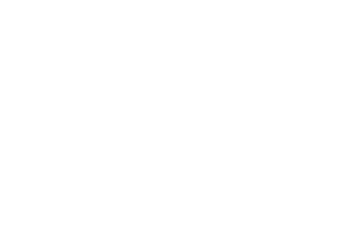

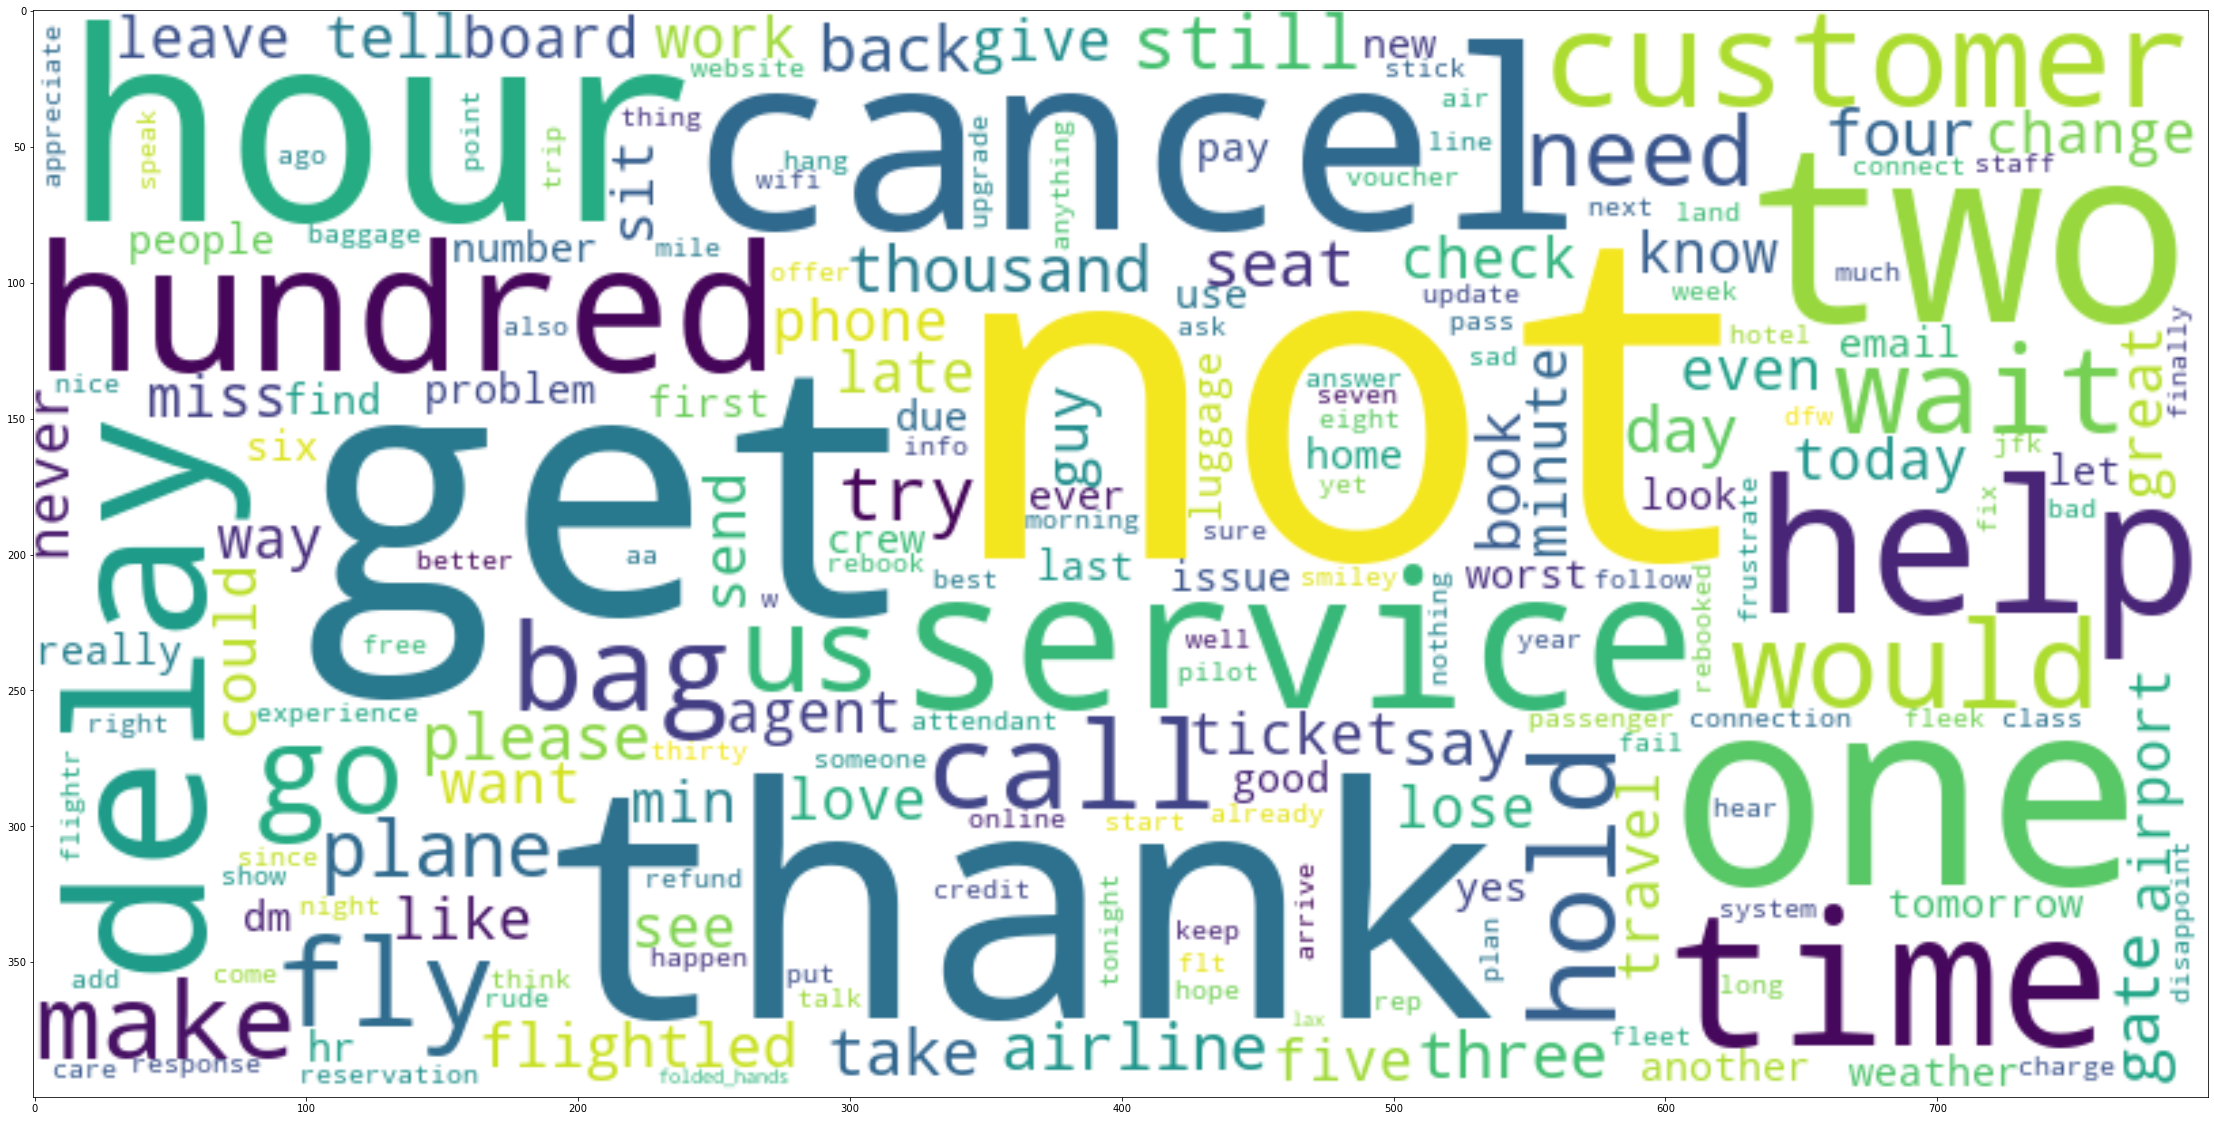

In [286]:

text = " ".join(tweet for tweet in tweets.text.astype(str))
print(f"There are {len(text)} words in the combination of all tweets in the dataset.")

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color="white", 
    width=800, height=400, 
    collocations=False,
    collocation_threshold=6).generate(text)

# Display the generated image:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


## Vectorization

### CountVectorizer

In [240]:
from sklearn.feature_extraction.text import CountVectorizer

In [287]:

#vectorizer = CountVectorizer(max_features=1000)  
bow_vectorizer = CountVectorizer(
    analyzer = "word", 
    max_features = 2000, 
    lowercase=False,
    stop_words=None,
    )
tweet_features = bow_vectorizer.fit_transform(tweets['text'])

tweet_features = tweet_features.toarray()  
print(tweet_features.shape)                     

(14640, 2000)


#### Now, looking at the vocabulary from the CountVectorization, which has integer counts for the frequency of each feature (word)

In [288]:
vocab = bow_vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
# array of counts by vocab word
dist = np.sum(tweet_features, axis=0)

bow_dict = dict(zip(vocab,dist))
top_bow = dict(sorted(bow_dict.items(), key=lambda x:x[1],reverse=True))
#print top 200 most frequent words
i=0
for k,v in top_bow.items():
    print(f"{k} : {v}")
    i=i+1
    if i==200:
        break

not : 3901
get : 2119
thank : 1789
one : 1101
cancel : 1056
two : 1025
service : 996
delay : 989
time : 953
help : 949
hundred : 936
flight : 908
go : 796
call : 778
fly : 776
bag : 765
wait : 751
customer : 750
would : 739
us : 718
hold : 715
make : 693
need : 686
hours : 672
plane : 630
try : 586
still : 581
please : 570
thousand : 564
gate : 541
back : 528
three : 523
seat : 519
take : 512
say : 508
flightled : 506
four : 506
book : 502
tell : 492
hour : 472
change : 462
phone : 454
know : 442
check : 437
like : 434
late : 426
today : 426
guy : 424
work : 409
miss : 407
airline : 400
ticket : 396
leave : 380
give : 373
way : 364
could : 356
board : 351
want : 348
airport : 344
great : 340
sit : 334
travel : 328
lose : 327
even : 325
day : 324
five : 323
love : 323
send : 320
never : 318
see : 314
tomorrow : 308
weather : 308
last : 307
really : 302
good : 297
home : 294
minutes : 293
issue : 292
people : 289
look : 288
email : 284
use : 282
pay : 281
another : 273
let : 273
new : 27

#### Observations:
1. Note that the top words correspond to the wordcloud presented earlier.
2. This was run iteratively. After the first pass, the entities of the Airlines (United, American, etc.) are some of the most frequent words. I therefore removed them, and the results above are with the airline names removed. I wonder if the overall accuracy could be improved by removing these entities? Most also show biases in the dataset? Could also be based on timing/season, since Airline businesses are highly seasonal, and summer months are usually when there are more issues, or times during bad weather.

### TF-IDF Vectorization

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [289]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
tweet_features = tfidf_vectorizer.fit_transform(tweets['text'])

tweet_features = tweet_features.toarray()

tweet_features.shape

(14640, 2000)

#### Now, looking at the vocabulary from the TfIdfVectorization, which has real-valued counts for the frequency of each feature (word)

In [290]:
tfidf_vocab = tfidf_vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(tweet_features, axis=0)

tfidf_dict = dict(zip(tfidf_vocab, dist))
top_tfidf = dict(sorted(tfidf_dict.items(), key=lambda x:x[1],reverse=True))
#print top 200 most frequent words
i=0
for k,v in top_tfidf.items():
    print(f"{k} : {v}")
    i=i+1
    if i==200:
        break

not : 587.1646129096486
thank : 548.9437955360145
get : 402.9230457956351
one : 234.82733291671332
cancel : 233.11337813365952
service : 232.508362426209
help : 231.833415128906
delay : 229.57989054025478
time : 216.93068342286037
flight : 216.69700971818466
two : 216.61253920254708
go : 198.13784444051106
call : 191.97555961183252
fly : 191.89985945017702
hundred : 190.53012885613992
customer : 189.5167905248242
bag : 184.76008975109386
wait : 184.4885576162904
hold : 184.3839531900697
would : 180.00804300245824
need : 174.16456775035306
make : 173.63765637385103
us : 169.6199529136869
hours : 165.5613868223775
please : 160.25072613645716
plane : 156.70234972130703
still : 154.56437138744195
try : 152.30247560034073
gate : 138.72372046400739
back : 136.94490356854544
take : 136.7211296156966
flightled : 134.88703883891395
say : 134.13300073446598
tell : 132.11745608422942
hour : 131.70934458391912
book : 130.4031461493111
guy : 130.13092133168672
seat : 130.121377016978
know : 128.455

## Model Building (YAY!)

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [128]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(tweets['airline_sentiment'].values)
print(le.classes_)

['negative' 'neutral' 'positive']


In [291]:
# Split data into training and testing set.

X = tweets.text

#note that due to imbalance in classes, I am using stratify to maintain this across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=12, stratify=labels)

In [292]:
print(X_test.shape)

(4392,)


In [293]:

sgd_cnt = Pipeline([
    ('vect', CountVectorizer(analyzer = "word", max_features = 2000, lowercase=False, stop_words=None)),
    ('clf', SGDClassifier(alpha=1e-3, random_state=42, max_iter=10, tol=None)), 
    ])

sgd_cnt.fit(X_train, y_train)

y_pred = sgd_cnt.predict(X_test)

In [298]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [294]:
print('test accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=le.classes_))

test accuracy 0.7907559198542805
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      2753
     neutral       0.68      0.50      0.58       930
    positive       0.73      0.67      0.69       709

    accuracy                           0.79      4392
   macro avg       0.75      0.70      0.72      4392
weighted avg       0.78      0.79      0.78      4392



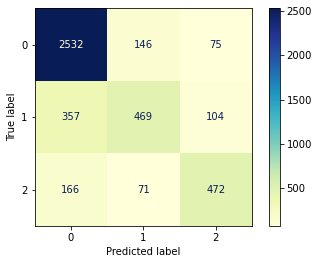

In [309]:
plot_confusion_matrix(sgd_cnt, X_test, y_test, cmap='YlGnBu')  
plt.show() 

In [295]:
sgd_idf = Pipeline([
    ('vect', TfidfVectorizer(max_features=2000, ngram_range=(1,1))),
    ('clf', SGDClassifier(penalty='l2', loss='hinge', alpha=0.001, random_state=42, class_weight='balanced', max_iter=20, tol=None)), 
    ])

sgd_idf.fit(X_train, y_train)

y_pred = sgd_idf.predict(X_test)

In [296]:
print('test accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=le.classes_))

test accuracy 0.7893897996357013
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      2753
     neutral       0.69      0.47      0.56       930
    positive       0.69      0.72      0.70       709

    accuracy                           0.79      4392
   macro avg       0.74      0.70      0.71      4392
weighted avg       0.78      0.79      0.78      4392



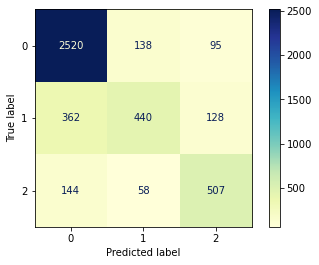

In [308]:
plot_confusion_matrix(sgd_idf, X_test, y_test, cmap='YlGnBu')  
plt.show()  

## Summary:
1. The accuracy of both models was equivalent on the test set: ~79%.
2. Both models perform best identifying negative sentiment tweets. I think this is due to the imbalance in the dataset, which consists of primarily negative sentiment tweets.
3. I did several feature engineering steps to try and improve model performance and the performance did not improve. I tried to take into account emojis and emoticons, and I removed the airline names from the tweets by adding them to the stopword lists.
4. The visual impression of the wordcloud aligns with my results.
5. I didn't see any benefit to BOW or TF-IDF Vectorization, as discussed in item 1, and evidenced by the performance of the models. If you look at the "top 200" words in the vocabularies, they are very similar, which would also aligns to the wordcloud. 
6. In summary, the skew to the negative words and sentiment means this model is very good at predicting negative tweets - the f1 score of both models is 87%. Since this case did not ask us to produce the best model, I believe the key here was understanding the role of data and feature engineering in the domain of NLP.
